# ***Pandas***

<sub>Acknowledgement: This notebook summarizing basics of pandas was provided by Hyun Min Kang, an Associate Professor of BioStatistics at the School of Public Health, University of Michigan, Ann Arbor.</sub>

### Creating a data frame

* Creating a dataframe can be done from a dictionary, or a list of list

In [1]:
import pandas as pd
df1 = pd.DataFrame({'x':[1,2,3],'y':[3,2,1],'s':['a','b','c']})
print(df1)
df2 = pd.DataFrame([[1,3,'a'],[2,2,'b'],[3,1,'c']],columns=['x','y','s'])
print(df2)

   x  y  s
0  1  3  a
1  2  2  b
2  3  1  c
   x  y  s
0  1  3  a
1  2  2  b
2  3  1  c


### Reading data from a local file

* `pandas` provides `read_csv` function to read comma-separated or tab-separated files
* `.head() function prints first few rows only
* `.columns` attribute list all columns
* '.describe()' function provides a basic summary of each column

In [2]:
!head sample_data/tips.csv

"total_bill","tip","sex","smoker","day","time","size"
16.99,1.01,"Female","No","Sun","Dinner",2
10.34,1.66,"Male","No","Sun","Dinner",3
21.01,3.5,"Male","No","Sun","Dinner",3
23.68,3.31,"Male","No","Sun","Dinner",2
24.59,3.61,"Female","No","Sun","Dinner",4
25.29,4.71,"Male","No","Sun","Dinner",4
8.77,2,"Male","No","Sun","Dinner",2
26.88,3.12,"Male","No","Sun","Dinner",4
15.04,1.96,"Male","No","Sun","Dinner",2


In [3]:
import pandas as pd

# Read the file
df = pd.read_csv("sample_data/tips.csv")

# print the very beginning
print(df.head(5))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [4]:
# print the column name
for i, v in enumerate(df.columns):  
  print(i,":",v) # print the column index  name
  
# how big is the data?
print("Size:",df.shape)

# get the basic statistics of each column
print(df.describe())

0 : total_bill
1 : tip
2 : sex
3 : smoker
4 : day
5 : time
6 : size
Size: (244, 7)
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


### Reading data online

* You can also read files online using a URL

In [5]:
import pandas as pd

# Obtain the URL to download the raw data
url = "https://raw.githubusercontent.com/jennybc/gapminder/master/data-raw/08_gap-every-five-years.tsv"
gap = pd.read_csv(url, sep='\t')  # for tsv file, use sep='\t'
print(gap.head(n=5))  # print the beginning of the data

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106


### Exploring pandas dataframe

* `.sample()` function randomly sample rows
* Columns can be accessed as if it is an attribute, or using '[]' like dictionary

In [6]:
# Get a random sample of the data
print(gap.sample(n=5))

# Accessing column can be done like an attribute
print(gap.country[11:13])

# Or accessed like a dictionary
print(gap['country'][11:13])

        country continent  year  lifeExp       pop    gdpPercap
408     Denmark    Europe  1952   70.780   4334000  9692.385245
729        Iran      Asia  1997   68.042  63327987  8263.590301
1429  Sri Lanka      Asia  1957   61.456   9128546  1072.546602
498     Eritrea    Africa  1982   43.890   2637297   524.875849
1052    Myanmar      Asia  1992   59.320  40546538   347.000000
11    Afghanistan
12        Albania
Name: country, dtype: object
11    Afghanistan
12        Albania
Name: country, dtype: object


### Asking basic questions about the data

* `.unique()` or `.describe()` function can answer some exploratory questions

In [7]:
# How many countries exist?
print(len(gap.country.unique()))

# How many years exist?
print(len(gap.year.unique()))

# What are available continents?
print(gap.continent.unique())

# Get the basic summary of Life Expectancy
print(gap.lifeExp.describe())

142
12
['Asia' 'Europe' 'Africa' 'Americas' 'Oceania']
count    1704.000000
mean       59.474439
std        12.917107
min        23.599000
25%        48.198000
50%        60.712500
75%        70.845500
max        82.603000
Name: lifeExp, dtype: float64


### Subsetting and slicing data

* You may subset or slice specific rows by condition

In [8]:
# I want to extract only USA data
gap_usa = gap[gap.country == 'United States']
print(gap_usa.shape)
print(gap_usa)

(12, 6)
            country continent  year  lifeExp        pop    gdpPercap
1608  United States  Americas  1952   68.440  157553000  13990.48208
1609  United States  Americas  1957   69.490  171984000  14847.12712
1610  United States  Americas  1962   70.210  186538000  16173.14586
1611  United States  Americas  1967   70.760  198712000  19530.36557
1612  United States  Americas  1972   71.340  209896000  21806.03594
1613  United States  Americas  1977   73.380  220239000  24072.63213
1614  United States  Americas  1982   74.650  232187835  25009.55914
1615  United States  Americas  1987   75.020  242803533  29884.35041
1616  United States  Americas  1992   76.090  256894189  32003.93224
1617  United States  Americas  1997   76.810  272911760  35767.43303
1618  United States  Americas  2002   77.310  287675526  39097.09955
1619  United States  Americas  2007   78.242  301139947  42951.65309


In [9]:
# I want to extract only 1952 and 2007 data
gap_55yr = gap[gap.year.isin([1952,2007])]
print(gap_55yr.shape)
print(gap_55yr.sample(n=5))

(284, 6)
              country continent  year  lifeExp        pop    gdpPercap
347       Congo, Rep.    Africa  2007   55.322    3800610  3632.557798
1368  Slovak Republic    Europe  1952   64.360    3558137  5074.659104
936          Malaysia      Asia  1952   48.463    6748378  1831.132894
1031          Morocco    Africa  2007   71.164   33757175  3820.175230
696             India      Asia  1952   37.373  372000000   546.565749


### Reshaping from tall to wide data

* `.pivot()` function allows conversion from tall to wide

In [10]:
gap_diff = gap_55yr.pivot(index='country',columns='year',values='lifeExp')
gap_diff.reset_index(inplace=True)  # make country as column name again



In [11]:
# define a new column 'Diff'
gap_diff['Diff'] = gap_diff[2007] - gap_diff[1952]
# define a new column 'Ratio'
gap_diff['Ratio'] = gap_diff[2007]/gap_diff[1952]

gap_diff.columns=['country','1952','2007','Diff','Ratio'] # rename columns

In [12]:
# print random rows
print(gap_diff.sample(n=5))

         country    1952    2007    Diff     Ratio
95        Norway  72.670  80.196   7.526  1.103564
122       Sweden  71.860  80.884   9.024  1.125578
54      Honduras  41.912  70.198  28.286  1.674890
31       Croatia  61.210  75.748  14.538  1.237510
123  Switzerland  69.620  81.701  12.081  1.173528


In [13]:
print(gap_diff.describe())

             1952        2007        Diff       Ratio
count  142.000000  142.000000  142.000000  142.000000
mean    49.057620   67.007423   17.949803    1.400948
std     12.225956   12.073021    8.124520    0.226774
min     28.801000   39.613000   -4.964000    0.897546
25%     39.059000   57.160250   11.906250    1.205769
50%     45.135500   71.935500   18.391500    1.372905
75%     59.765000   76.413250   24.311750    1.582357
max     72.670000   82.603000   38.062000    2.012880


### Changing from wide to tall data

* `.melt()` function allows conversion from wide to tall data.

In [14]:
gap_diff_t = gap_diff.melt(id_vars = ['country'],  # columns used as ID
                           value_vars = ['Diff','Ratio'], # columns to melt
                           var_name = 'type',      # column names becomes variable
                           value_name = 'value')   # values in columns becomes value
print(gap_diff_t.sample(n=5))

                    country   type     value
153                 Bolivia  Ratio  1.622062
154  Bosnia and Herzegovina  Ratio  1.390784
156                  Brazil  Ratio  1.421726
34                  Denmark   Diff  7.552000
217                   Libya  Ratio  1.730965


### Concatenating and merging dataframes

* You may concatenate two dataframes by rows or by columns (if consistently ordered)
* You may use `.merge()` function to combine the data when overlapping objects are not ordered in the same way

In [15]:
# I want to extract only 1952 and 2007 data
gap_1952 = gap[gap.year == 1952]
gap_2007 = gap[gap.year == 2007]

gap_55yr_v2 = pd.concat([gap_1952,gap_2007],axis=0) # combine rows

print(gap_55yr_v2.sample(n=5))
print(gap_55yr.shape)
print(gap_55yr_v2.shape)

           country continent  year  lifeExp       pop    gdpPercap
431       Djibouti    Africa  2007   54.791    496374  2082.481567
300       Colombia  Americas  1952   50.643  12350771  2144.115096
1331       Senegal    Africa  2007   63.062  12267493  1712.472136
192   Burkina Faso    Africa  1952   31.975   4469979   543.255241
239       Cameroon    Africa  2007   50.430  17696293  2042.095240
(284, 6)
(284, 6)


In [16]:
# merge the two data horizontally
gap_55yr_v3 = gap_1952.merge(gap_2007, on = ['country','continent'], suffixes=['_1952','_2007'])

# print the column names of merged data
print(gap_55yr_v3.columns)

# print a peek of the contents
print(gap_55yr_v3.sample(n=5))

Index(['country', 'continent', 'year_1952', 'lifeExp_1952', 'pop_1952',
       'gdpPercap_1952', 'year_2007', 'lifeExp_2007', 'pop_2007',
       'gdpPercap_2007'],
      dtype='object')
          country continent  year_1952  lifeExp_1952  pop_1952  \
59      Indonesia      Asia       1952        37.468  82052000   
76     Madagascar    Africa       1952        36.681   4762912   
109  Saudi Arabia      Asia       1952        39.875   4005677   
130       Tunisia    Africa       1952        44.600   3647735   
22           Chad    Africa       1952        38.092   2682462   

     gdpPercap_1952  year_2007  lifeExp_2007   pop_2007  gdpPercap_2007  
59       749.681655       2007        70.650  223547000     3540.651564  
76      1443.011715       2007        59.443   19167654     1044.770126  
109     6459.554823       2007        72.777   27601038    21654.831940  
130     1468.475631       2007        73.923   10276158     7092.923025  
22      1178.665927       2007        50.651   

### Grouping, aggregating and sorting

* Use `.groupby()` function to create a new DataFrame aggregating on specific attributes
* `.sort_values()` can sort a DataFrame by specific columns

In [17]:
# group by country, and get avg values
gap_grp = gap.groupby(by=['country','continent']).mean()
print(gap_grp.head(n=10))

                         year    lifeExp           pop     gdpPercap
country     continent                                               
Afghanistan Asia       1979.5  37.478833  1.582372e+07    802.674598
Albania     Europe     1979.5  68.432917  2.580249e+06   3255.366633
Algeria     Africa     1979.5  59.030167  1.987541e+07   4426.025973
Angola      Africa     1979.5  37.883500  7.309390e+06   3607.100529
Argentina   Americas   1979.5  69.060417  2.860224e+07   8955.553783
Australia   Oceania    1979.5  74.662917  1.464931e+07  19980.595634
Austria     Europe     1979.5  73.103250  7.583298e+06  20411.916279
Bahrain     Asia       1979.5  65.605667  3.739132e+05  18077.663945
Bangladesh  Asia       1979.5  49.834083  9.075540e+07    817.558818
Belgium     Europe     1979.5  73.641750  9.725119e+06  19900.758072


In [18]:
# sort by avg life expectancy
gap_grp.sort_values('lifeExp',ascending=False,inplace=True)
print(gap_grp.head(n=10))

                         year    lifeExp           pop     gdpPercap
country     continent                                               
Iceland     Europe     1979.5  76.511417  2.269781e+05  20531.422272
Sweden      Europe     1979.5  76.177000  8.220029e+06  19943.126104
Norway      Europe     1979.5  75.843000  4.031441e+06  26747.306554
Netherlands Europe     1979.5  75.648500  1.378680e+07  21748.852208
Switzerland Europe     1979.5  75.565083  6.384293e+06  27074.334405
Canada      Americas   1979.5  74.902750  2.446297e+07  22410.746340
Japan       Asia       1979.5  74.826917  1.117588e+08  17750.869984
Australia   Oceania    1979.5  74.662917  1.464931e+07  19980.595634
Denmark     Europe     1979.5  74.370167  4.994187e+06  21671.824888
France      Europe     1979.5  74.348917  5.295256e+07  18833.570327


### Very basic plotting with pandas

In [19]:
import pandas as pd

url = "https://raw.githubusercontent.com/jennybc/gapminder/master/data-raw/08_gap-every-five-years.tsv"
gap = pd.read_csv(url, sep='\t')  # for tsv file, use sep='\t'

<Axes: ylabel='Frequency'>

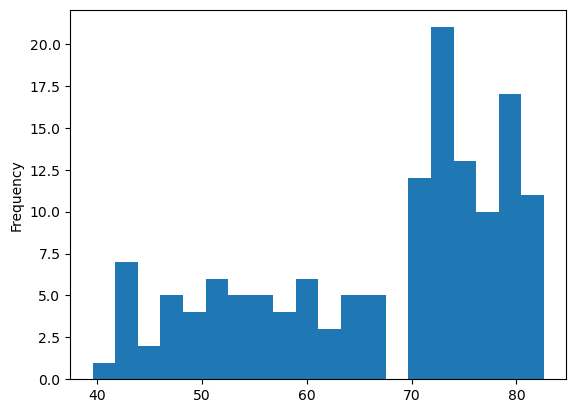

In [20]:
# get the histogram of life Expectancy in 2007
gap_2007 = gap[gap.year == 2007]
gap_2007.lifeExp.plot.hist(bins=20)

<Axes: xlabel='year', ylabel='lifeExp'>

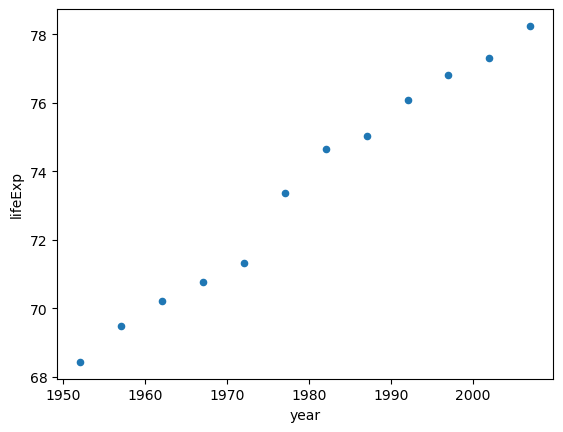

In [21]:
# Visualize how life expectancy changed in US since 1952
gap_usa = gap[gap.country == 'United States']
gap_usa.plot.scatter(x='year',y='lifeExp')